# Email Marketing Campaign

The marketing team of an e-commerce site has launched an email campaign. This site has email addresses from all the users who created an account in the past.

They have chosen a random sample of users and emailed them. The email lets the user know about a new feature implemented on the site. From the marketing team perspective, success is if the user clicks on the link inside of the email. This link takes the user to the company site.

You are in charge of figuring out how the email campaign performed and were asked the following questions:
- What percentage of users opened the email and what percentage clicked on the link within the email?
- The VP of marketing thinks that it is stupid to send emails in a random way. Based on all the information you have about the emails that were sent, can you build a model to optimize in future how to send emails to maximize the probability of users clicking on the link inside the email?
- By how much do you think your model would improve click through rate (defined as # of users who click on the link/total users who receive the email). How would you test that?
- Did you find any interesting pattern on how the email campaign performed for different segments of users? Explain.

# Index

1. [Initial Exploration](#explore)
2. [Click Through Rate](#clickthrough)
3. [Modeling](#model)

<a name='explore'></a>
# Initial Exploration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix

In [ ]:
emails = pd.read_csv('https://raw.githubusercontent.com/bundickm/DataMasked---Private/main/CSVs/email_table.csv?token=ALJ4RG5HJWWQXNJKDRSXDADAFQJ76')
print(emails.shape)
emails.head()

(100000, 7)


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [ ]:
emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [ ]:
emails.describe()

,email_id,hour,user_past_purchases
count,100000.000000,100000.000000,100000.00000
mean,498690.196160,9.059300,3.87845
std,289230.727534,4.439637,3.19611
min,8.000000,1.000000,0.00000
25%,246708.250000,6.000000,1.00000
50%,498447.000000,9.000000,3.00000
75%,749942.750000,12.000000,6.00000
max,999998.000000,24.000000,22.00000


In [ ]:
clicked_link = pd.read_csv('https://raw.githubusercontent.com/bundickm/DataMasked---Private/main/CSVs/link_clicked_table.csv?token=ALJ4RG6PXJ2PMUB6I7BFAWTAFQKDG')
print(clicked_link.shape)
clicked_link.head()

(2119, 1)


,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [ ]:
email_opened = pd.read_csv('https://raw.githubusercontent.com/bundickm/DataMasked---Private/main/CSVs/email_opened_table.csv?token=ALJ4RG6BM4YX2LMV4KB4IH3AFQKE4')
print(email_opened.shape)
email_opened.head()

(10345, 1)


,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [ ]:
email_opened['email_opened'] = 1
clicked_link['clicked_link'] = 1
emails = emails.merge(email_opened, how='left').merge(clicked_link, how='left')
emails = emails.fillna(0)

emails['short_email'] = np.where(emails['email_text'] == 'short_email', True, False)
emails['personalized'] = np.where(emails['email_version'] == 'personalized', True, False)

weekdays = {"Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4,
            "Friday": 5, "Saturday": 6, "Sunday": 7}
emails["weekday"] = emails['weekday'].map(weekdays)


emails = emails.drop(['email_text', 'email_version'], axis='columns')

emails.head()

,email_id,hour,weekday,user_country,user_past_purchases,email_opened,clicked_link,short_email,personalized
0,85120,2,7,US,5,0.0,0.0,True,True
1,966622,12,7,UK,2,1.0,1.0,False,True
2,777221,11,3,US,2,0.0,0.0,False,True
3,493711,6,1,UK,1,0.0,0.0,True,False
4,106887,14,1,US,6,0.0,0.0,False,False


In [ ]:
for col in ['short_email', 'personalized', 'hour', 'weekday', 'user_country']:
    print(col)
    print(emails[col].value_counts(normalize=True).sort_values(ascending=False))
    print()

short_email
False    0.50276
True     0.49724
Name: short_email, dtype: float64

personalized
False    0.50209
True     0.49791
Name: personalized, dtype: float64

hour
9     0.08529
8     0.08398
7     0.08204
10    0.08180
11    0.07483
6     0.07465
5     0.06551
12    0.06508
4     0.05622
13    0.05581
3     0.04610
14    0.04580
2     0.03676
15    0.03493
16    0.02759
1     0.02703
17    0.01893
18    0.01421
19    0.00905
20    0.00656
21    0.00365
22    0.00204
23    0.00145
24    0.00069
Name: hour, dtype: float64

weekday
6    0.14569
7    0.14387
1    0.14363
4    0.14277
5    0.14177
2    0.14143
3    0.14084
Name: weekday, dtype: float64

user_country
US    0.60099
UK    0.19939
FR    0.09995
ES    0.09967
Name: user_country, dtype: float64



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


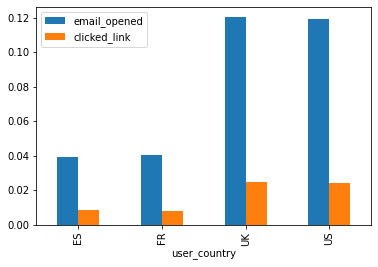

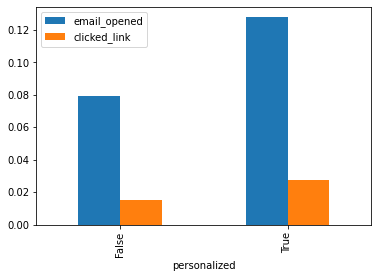

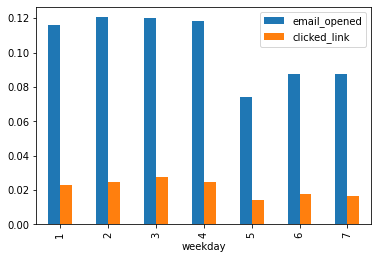

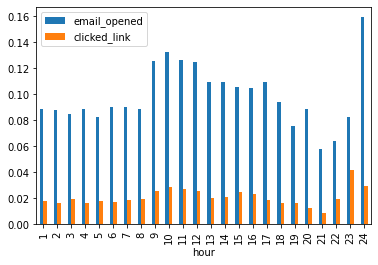

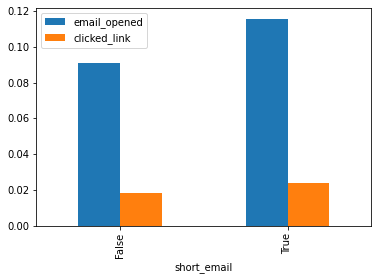

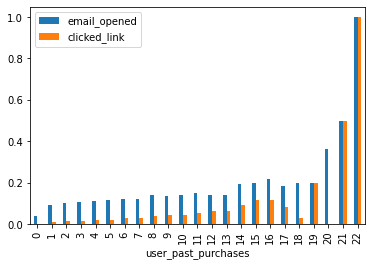

In [ ]:
for col in ['user_country', 'personalized', 'weekday', 'hour', 'short_email', 'user_past_purchases']:
    emails.groupby(col)['email_opened', 'clicked_link'].mean().plot.bar();
    plt.show()

Takeaways from Exploration
- Majority of users are from the US (60%), follow by UK (20%)
- Emails are sent evenly throughout the week even though more interactions (`email_opened` and `clicked_link`) occur during Monday to Thursday
- Afternoon emails are the optimal time to send them (12 PM  to 5 PM)
- Short personalized emails are best contrary to the even splits currently
- As users make more purchases they are more likely to interact with the emails

In [ ]:
emails = pd.get_dummies(emails, columns=['user_country'])
emails.corr()

,email_id,hour,weekday,user_past_purchases,email_opened,clicked_link,short_email,personalized,user_country_ES,user_country_FR,user_country_UK,user_country_US
email_id,1.000000,-0.003563,-0.005948,0.002099,0.000443,-0.001198,0.001249,-0.000241,0.000176,0.000045,-0.001023,0.000700
hour,-0.003563,1.000000,0.003560,0.002986,0.025972,0.011047,-0.001611,-0.000827,0.001188,-0.002363,-0.001930,0.002296
weekday,-0.005948,0.003560,1.000000,-0.005769,-0.046195,-0.022846,0.000093,-0.002029,-0.002021,-0.000959,0.000777,0.001190
user_past_purchases,0.002099,0.002986,-0.005769,1.000000,0.085934,0.105445,-0.003217,-0.001914,0.006199,0.004537,-0.005430,-0.002140
email_opened,0.000443,0.025972,-0.046195,0.085934,1.000000,0.421750,0.040523,0.079471,-0.070272,-0.068750,0.027393,0.062746
clicked_link,-0.001198,0.011047,-0.022846,0.105445,0.421750,1.000000,0.018519,0.042208,-0.029716,-0.030511,0.012077,0.027012
short_email,0.001249,-0.001611,0.000093,-0.003217,0.040523,0.018519,1.000000,-0.000283,0.002204,0.000606,-0.001675,-0.000352
personalized,-0.000241,-0.000827,-0.002029,-0.001914,0.079471,0.042208,-0.000283,1.000000,0.001825,-0.000974,0.002261,-0.002364
user_country_ES,0.000176,0.001188,-0.002021,0.006199,-0.070272,-0.029716,0.002204,0.001825,1.000000,-0.110876,-0.166044,-0.408341
user_country_FR,0.000045,-0.002363,-0.000959,0.004537,-0.068750,-0.030511,0.000606,-0.000974,-0.110876,1.000000,-0.166303,-0.408978


<a name='clickthrough'></a>
# Click Through Rate

Finding the click through rates for opening and clicking the link are both just simple calculations. The drop in percent of users we see from `Open %` to `Clicked %` is in line with what we would expect from any sales/marketing funnel.

In [ ]:
pd.DataFrame({'Open %': [emails['email_opened'].sum()/len(emails)*100],
              'Clicked %': [emails['clicked_link'].sum()/len(emails)*100]})

,Open %,Clicked %
0,10.345,2.119


<a name='model'></a>
# Modeling

In [ ]:
emails.head()

,email_id,hour,weekday,user_past_purchases,email_opened,clicked_link,short_email,personalized,user_country_ES,user_country_FR,user_country_UK,user_country_US
0,85120,2,7,5,0.0,0.0,True,True,0,0,0,1
1,966622,12,7,2,1.0,1.0,False,True,0,0,1,0
2,777221,11,3,2,0.0,0.0,False,True,0,0,0,1
3,493711,6,1,1,0.0,0.0,True,False,0,0,1,0
4,106887,14,1,6,0.0,0.0,False,False,0,0,0,1


In [ ]:
X, y = emails.drop(['email_id', 'clicked_link'], axis='columns'), emails['clicked_link']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

rf_model = RandomForestClassifier(n_jobs=-1, oob_score=True,)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
print('OOB accuracy:', rf_model.oob_score_)
print('\nConfusion Matrix')
print(pd.DataFrame(confusion_matrix(y_train, 
                   rf_model.oob_decision_function_[:,1].round(),
                   labels=[0, 1])))

OOB accuracy: 0.971955223880597

Confusion Matrix
       0    1
0  64935  657
1   1222  186


In [ ]:
print('Test accuracy:', rf_model.score(X_test, y_test))
print('\nConfusion Matrix')
print(pd.DataFrame(confusion_matrix(y_test, 
                   rf_model.predict(X_test),
                   labels=[0, 1])))

Test accuracy: 0.9732727272727273

Confusion Matrix
       0    1
0  32001  288
1    594  117


In [ ]:
pd.DataFrame({'column': X.columns, 'feature_importance': rf_model.feature_importances_})

,column,feature_importance
0,hour,0.348758
1,weekday,0.147191
2,user_past_purchases,0.206489
3,email_opened,0.228131
4,short_email,0.027190
5,personalized,0.015969
6,user_country_ES,0.005155
7,user_country_FR,0.004450
8,user_country_UK,0.007812
9,user_country_US,0.008855


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, classification_report, precision_score

In [ ]:
f1_score(y_test, predictions)

0.343005630142919

In [ ]:
roc_auc_score(y_test, predictions)

0.7598678626690674

In [ ]:
temp = rf_model.predict_proba(X_test)

In [ ]:
for threshold in [.29, .3, .31]:
    predictions = []
    for item in temp:
        if item[0] > threshold:
            predictions.append(0)
        else:
            predictions.append(1)
    print('Threshold:', threshold)
    print('rocauc:', roc_auc_score(y_test, predictions))
    print('Precision:', precision_score(y_test, predictions))
    print()

Threshold: 0.29
rocauc: 0.5274699369212099
Precision: 0.3178294573643411

Threshold: 0.3
rocauc: 0.5287060700349546
Precision: 0.3028169014084507

Threshold: 0.31
rocauc: 0.5320054523408254
Precision: 0.2981366459627329



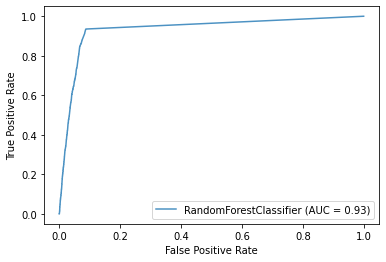

In [ ]:
from sklearn.metrics import plot_roc_curve

ax = plt.gca()
rfc_disp = plot_roc_curve(rf_model, X_test, y_test, ax=ax, alpha=0.8)
plt.show()